In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaNs
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('predictores_nd.xlsx')
df.head()

,ID,SEXO,EDAD,PERTENENCIA_ETNICA,gp_desplaz,gp_migrant,gp_indigen,LOC_RES,REGIMEN_AFILIACION,TIPO_TB,CONDICION_INGRESO,RESULTADO_BK_RECOD,CONDICION_VIH,Consumidor_SPA,Desnutricion,Tabaquismo,Enf_Mental,PERDIDA_SEGUIMIENTO
0,1,M,25,OTRO,NO,NO,NO,FDB,P,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO
1,2,M,66,OTRO,NO,NO,NO,SO,S,PULMONAR,OPT,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO
2,3,M,38,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,SI,NO,NO,NO
3,4,M,67,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,SI,NO,NO
4,5,F,25,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO


In [ ]:
print(df.columns)

Index(['ID', 'SEXO', 'EDAD', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant',
       'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB',
       'CONDICION_INGRESO', 'RESULTADO_BK_RECOD', 'CONDICION_VIH',
       'Consumidor_SPA', 'Desnutricion', 'Tabaquismo', 'Enf_Mental',
       'PERDIDA_SEGUIMIENTO'],
      dtype='object')


In [ ]:
df['PERDIDA_SEGUIMIENTO_N'] = df['PERDIDA_SEGUIMIENTO'].map({'NO': 0, 'SI': 1})
df_per = pd.DataFrame(df)
df_per.head()

,ID,SEXO,EDAD,PERTENENCIA_ETNICA,gp_desplaz,gp_migrant,gp_indigen,LOC_RES,REGIMEN_AFILIACION,TIPO_TB,CONDICION_INGRESO,RESULTADO_BK_RECOD,CONDICION_VIH,Consumidor_SPA,Desnutricion,Tabaquismo,Enf_Mental,PERDIDA_SEGUIMIENTO,PERDIDA_SEGUIMIENTO_N
0,1,M,25,OTRO,NO,NO,NO,FDB,P,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0
1,2,M,66,OTRO,NO,NO,NO,SO,S,PULMONAR,OPT,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0
2,3,M,38,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,SI,NO,NO,NO,0
3,4,M,67,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,SI,NO,NO,0
4,5,F,25,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0


In [ ]:
categoric_columns = ['SEXO', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant', 'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB', 'CONDICION_INGRESO', 'RESULTADO_BK_RECOD','CONDICION_VIH', 'Consumidor_SPA','Desnutricion', 'Tabaquismo', 'Enf_Mental']
columns = list(df_per.columns)
numeric_columns = [i for i in columns if i not in categoric_columns]

In [ ]:
numeric_columns.remove('ID')
numeric_columns.remove('PERDIDA_SEGUIMIENTO')
numeric_columns.remove('PERDIDA_SEGUIMIENTO_N')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_features = enc.fit_transform(df_per[categoric_columns])

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=enc.get_feature_names_out(categoric_columns))

In [ ]:
print(encoded_df.columns)

Index(['SEXO_F', 'SEXO_M', 'PERTENENCIA_ETNICA_AFRO',
       'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO',
       'PERTENENCIA_ETNICA_PALENQUERO', 'PERTENENCIA_ETNICA_RAIZAL',
       'PERTENENCIA_ETNICA_ROOM (GITANO)', 'gp_desplaz_NO', 'gp_desplaz_SI',
       'gp_migrant_NO', 'gp_migrant_SI', 'gp_indigen_NO', 'gp_indigen_SI',
       'LOC_RES_CO', 'LOC_RES_FDB', 'LOC_RES_NORTE', 'LOC_RES_SO',
       'LOC_RES_SUR', 'LOC_RES_Sin Dato', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S', 'TIPO_TB_EXTRAPULMONAR', 'TIPO_TB_PULMONAR',
       'CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_OPT',
       'CONDICION_INGRESO_REMITIDO', 'CONDICION_INGRESO_RTF',
       'CONDICION_INGRESO_RTPS', 'CONDICION_INGRESO_RTR',
       'RESULTADO_BK_RECOD_NEGATIVO', 'RESULTADO_BK_RECOD_NO REALIZADO',
       'RESULTADO_BK_RECOD_POSITIVO', 'RESULTADO_BK_RECOD_SD',
       'CONDICION_VIH_DESCONOCIDO', 'CONDICION_VIH_NEGATI

In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(df[numeric_columns])
scaled_num = numerical_features_scaled

In [ ]:
encoded_cat = enc.fit_transform(df_per[categoric_columns])
scaled_num = scaler.transform(df_per[numeric_columns])
scaled_num_df = pd.DataFrame(scaled_num, columns=numeric_columns, index=df.index)


In [ ]:
# Convert the sparse matrix to a DataFrame
encoded_cat_df = pd.DataFrame.sparse.from_spmatrix(encoded_cat,
                                                    index=df.index,
                                                    columns=enc.get_feature_names_out(categoric_columns))
                                                    # Assuming 'enc' is your OneHotEncoder and 'categoric_columns' are your categorical columns


# Now concatenate the DataFrames
df2 = pd.concat([scaled_num_df, encoded_cat_df, df['PERDIDA_SEGUIMIENTO_N']], axis=1)
print(df2['PERDIDA_SEGUIMIENTO_N'].value_counts())

PERDIDA_SEGUIMIENTO_N
0    9364
1     738
Name: count, dtype: int64


In [ ]:
df2.shape

(10102, 50)

In [ ]:
print(df2.columns)

Index(['EDAD', 'SEXO_F', 'SEXO_M', 'PERTENENCIA_ETNICA_AFRO',
       'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO',
       'PERTENENCIA_ETNICA_PALENQUERO', 'PERTENENCIA_ETNICA_RAIZAL',
       'PERTENENCIA_ETNICA_ROOM (GITANO)', 'gp_desplaz_NO', 'gp_desplaz_SI',
       'gp_migrant_NO', 'gp_migrant_SI', 'gp_indigen_NO', 'gp_indigen_SI',
       'LOC_RES_CO', 'LOC_RES_FDB', 'LOC_RES_NORTE', 'LOC_RES_SO',
       'LOC_RES_SUR', 'LOC_RES_Sin Dato', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S', 'TIPO_TB_EXTRAPULMONAR', 'TIPO_TB_PULMONAR',
       'CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_OPT',
       'CONDICION_INGRESO_REMITIDO', 'CONDICION_INGRESO_RTF',
       'CONDICION_INGRESO_RTPS', 'CONDICION_INGRESO_RTR',
       'RESULTADO_BK_RECOD_NEGATIVO', 'RESULTADO_BK_RECOD_NO REALIZADO',
       'RESULTADO_BK_RECOD_POSITIVO', 'RESULTADO_BK_RECOD_SD',
       'CONDICION_VIH_DESCONOCIDO', 'CONDICION_VI

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=42)

# Printing the class distributions in the original dataset and the split sets
print("Original Class Distribution:")
print(f"Class 0: {np.sum(y == 0)}, Class 1: {np.sum(y == 1)}\n")

print("Training Set Class Distribution:")
print(f"Class 0: {np.sum(y_train == 0)}, Class 1: {np.sum(y_train == 1)}\n")

print("Validation Set Class Distribution:")
print(f"Class 0: {np.sum(y_val == 0)}, Class 1: {np.sum(y_val == 1)}\n")

print("Test Set Class Distribution:")
print(f"Class 0: {np.sum(y_test == 0)}, Class 1: {np.sum(y_test == 1)}\n")

# Create StratifiedShuffleSplit object
tratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Perform stratified splitting
# Use the correct variable name 'tratified_splitter'
for train_index, test_index in tratified_splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Original Class Distribution:
Class 0: 9364, Class 1: 738

Training Set Class Distribution:
Class 0: 5618, Class 1: 443

Validation Set Class Distribution:
Class 0: 1873, Class 1: 147

Test Set Class Distribution:
Class 0: 1873, Class 1: 148



## **Oversample/undersample and Cross Validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import time

In [ ]:
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val_b, X_test_b, y_val_b, y_test_b = train_test_split(X_val_b, y_val_b, test_size=0.5, stratify=y_val_b, random_state=42)

kf = StratifiedKFold(n_splits=5, shuffle=False)
rf = RandomForestClassifier(n_estimators=100, random_state=13)
cross_val_score(rf, X_train_b, y_train_b, cv=kf, scoring='recall')

array([0.12359551, 0.125     , 0.14772727, 0.08988764, 0.13483146])

In [ ]:
score = cross_val_score(rf, X_train_b, y_train_b, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.12359551 0.125      0.14772727 0.08988764 0.13483146]
Average Cross Validation Recall score: 0.12420837589376914


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=kf,
                          scoring='recall').fit(X_train_b, y_train_b)

In [ ]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 12, 'n_estimators': 50, 'random_state': 13}
Best score: 0.09486721144024515


In [ ]:
y_pred_rf = grid_rf.predict(X_test_b)

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, fbeta_score
from sklearn.metrics import roc_auc_score

In [ ]:

cm1 = confusion_matrix(y_test_b, y_pred_rf )

rf_Recall = recall_score(y_test_b, y_pred_rf )
rf_Precision = precision_score(y_test_b, y_pred_rf )
rf_f1 = f1_score(y_test_b, y_pred_rf )
rf_accuracy = accuracy_score(y_test_b, y_pred_rf )
rf_beta_score = fbeta_score(y_test_b, y_pred_rf , beta=2, average='binary')
rf_AUC= roc_auc_score (y_test_b, y_pred_rf )

print(cm1)

[[1855   18]
 [ 134   14]]


Text(0.5, 427.9555555555555, 'Predicted label')

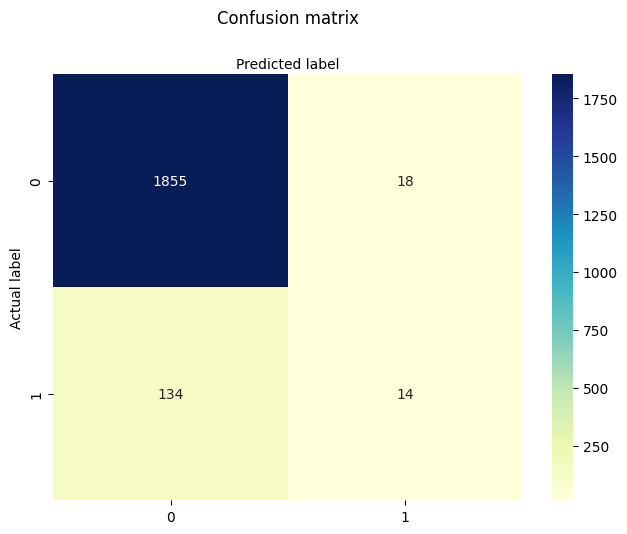

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy, rf_AUC )]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'AUC'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy,AUC
0,No Under/Oversampling,0.094595,0.4375,0.155556,0.92479,0.542492


medir tiempo

In [ ]:
time_start = time.time()
np.int = int
grid_rf.fit(X_train_b, y_train_b)
time_over_under = time.time() - time_start
values_base_line_rf = [200, grid_rf.best_score_, time_over_under]
results_base_line_rf = pd.DataFrame([values_base_line_rf], columns=['n_estimators', 'best_score', 'time'])
results_base_line_rf

,n_estimators,best_score,time
0,200,0.094867,28.825912


## **Random Oversampling**

In [ ]:
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train_o, X_val_o, y_train_o, y_val_o = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val_o, X_test_o, y_val_o, y_test_o = train_test_split(X_val_o, y_val_o, test_size=0.5, stratify=y_val_o, random_state=42)

from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)

In [ ]:
X_over, y_over = ros.fit_resample(X_train_o, y_train_o)

In [ ]:
print('No perdida:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('perdida:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

No perdida: 5618 / 50.0 % of the dataset
perdida: 5618 / 50.0 % of the dataset


In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline

random_overs_pipeline = make_pipeline(RandomOverSampler(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))

In [ ]:
score2 = cross_val_score(random_overs_pipeline, X_train_o, y_train_o, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score2))
print("Average Cross Validation Recall score: {}".format(score2.mean()))

Cross Validation Recall Scores are: [0.21348315 0.27272727 0.18181818 0.23595506 0.21348315]
Average Cross Validation Recall score: 0.22349336057201225


In [ ]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_over_rf = GridSearchCV(random_overs_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_over_rf.fit(X_train_o, y_train_o)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', grid_over_rf.best_params_)
print('Best score:', grid_over_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__random_state': 13}
Best score: 0.5485699693564862


In [ ]:
y_pred_over = grid_over_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test_o)

In [ ]:
cm2 = confusion_matrix(y_test_o, y_pred_over)

over_rf_Recall = recall_score(y_test_o, y_pred_over)
over_rf_Precision = precision_score(y_test_o, y_pred_over)
over_rf_f1 = f1_score(y_test_o, y_pred_over)
over_rf_accuracy = accuracy_score(y_test_o, y_pred_over)
over_rf_beta_score = fbeta_score(y_test_o, y_pred_over, beta=2, average='binary')
over_rf_AUC= roc_auc_score (y_test_o, y_pred_over)
print(cm2)

[[1555  318]
 [  62   86]]


Text(0.5, 427.9555555555555, 'Predicted label')

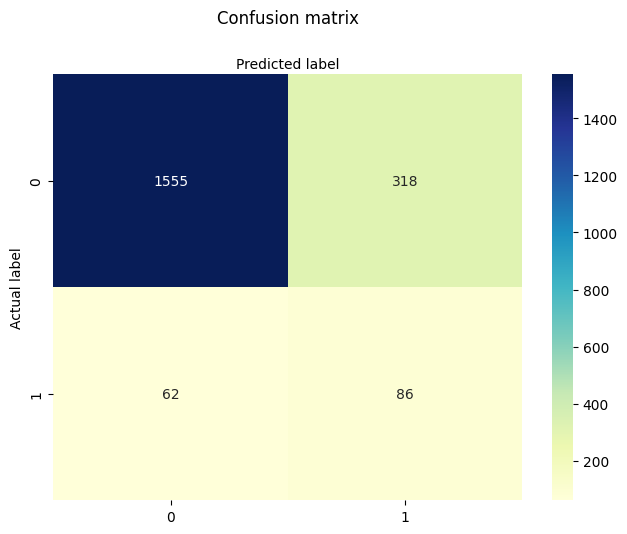

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(over_rf_Recall, over_rf_Precision, over_rf_f1, over_rf_accuracy, over_rf_AUC)]

over_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'AUC'])
over_rf_score.insert(0, 'Random Forest with', 'Random Oversampling')
over_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy,AUC
0,Random Oversampling,0.581081,0.212871,0.311594,0.811974,0.70565


Tiempos

In [ ]:
time_start = time.time()
np.int = int
grid_over_rf.fit(X_train_o, y_train_o)
time_over_rf = time.time() - time_start
values_over_rf = [50, grid_over_rf.best_score_, time_over_rf]
results_over_rf = pd.DataFrame([values_over_rf], columns=['n_estimators', 'best_score', 'time'])
results_over_rf

,n_estimators,best_score,time
0,50,0.54857,49.763796


## **Random Undersampling**

In [ ]:
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train_u, X_val_u, y_train_u, y_val_u = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val_u, X_test_u, y_val_u, y_test_u = train_test_split(X_val_u, y_val_u, test_size=0.5, stratify=y_val_u, random_state=42)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=42)

In [ ]:
# fit and apply the transform
X_under, y_under = rus.fit_resample(X_train_u, y_train_u)

In [ ]:
print('No perdida:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('perdida:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

No perdida: 443 / 50.0 % of the dataset
perdida: 443 / 50.0 % of the dataset


In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline

random_under_pipeline = make_pipeline(RandomUnderSampler(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))

In [ ]:
score3 = cross_val_score(random_under_pipeline, X_train_u, y_train_u, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score3))
print("Average Cross Validation Recall score: {}".format(score3.mean()))

Cross Validation Recall Scores are: [0.61797753 0.67045455 0.625      0.69662921 0.61797753]
Average Cross Validation Recall score: 0.6456077630234933


In [ ]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_under_rf = GridSearchCV(random_under_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_under_rf.fit(X_train_u, y_train_u)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('randomundersampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', grid_under_rf.best_params_)
print('Best score:', grid_under_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__random_state': 13}
Best score: 0.6365168539325843


In [ ]:
y_pred_under = grid_under_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test_u)

In [ ]:
cm3 = confusion_matrix(y_test_u, y_pred_under)

under_rf_Recall = recall_score(y_test_u, y_pred_under)
under_rf_Precision = precision_score(y_test_u, y_pred_under)
under_rf_f1 = f1_score(y_test_u, y_pred_under)
under_rf_accuracy = accuracy_score(y_test_u, y_pred_under)
under_rf_AUC= roc_auc_score (y_test_u, y_pred_under)
print(cm3)

[[1424  449]
 [  48  100]]


Text(0.5, 427.9555555555555, 'Predicted label')

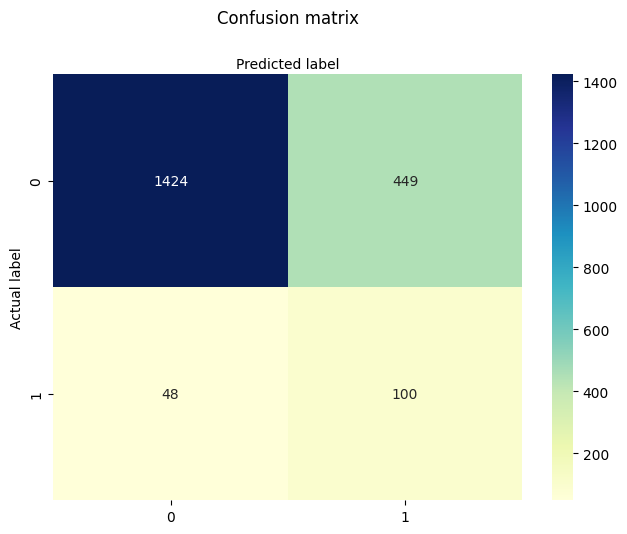

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(under_rf_Recall, under_rf_Precision, under_rf_f1, under_rf_accuracy, under_rf_AUC )]

under_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'AUC'])
under_rf_score.insert(0, 'Random Forest with', 'Undersampling')
under_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy,AUC
0,Undersampling,0.675676,0.182149,0.286944,0.754082,0.717977


Tiempos

In [ ]:
time_start = time.time()
np.int = int
grid_under_rf.fit(X_train_u, y_train_u)
time_under_rf = time.time() - time_start
values_under_rf = [50, grid_under_rf.best_score_, time_under_rf]
results_under_rf = pd.DataFrame([values_under_rf], columns=['n_estimators', 'best_score', 'time'])
results_under_rf

,n_estimators,best_score,time
0,50,0.636517,21.200212


## **SMOTE (Synthetic Minority Oversampling Technique)**

In [ ]:
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val_s, X_test_s, y_val_s, y_test_s = train_test_split(X_val_s, y_val_s, test_size=0.5, stratify=y_val_s, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote_pipeline = make_pipeline(SMOTE(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))
cross_val_score(smote_pipeline, X_train_s, y_train_s, scoring='recall', cv=kf)

array([0.15730337, 0.22727273, 0.19318182, 0.17977528, 0.19101124])

In [ ]:
score3 = cross_val_score(smote_pipeline, X_train_s, y_train_s, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score3))
print("Average Cross Validation Recall score: {}".format(score3.mean()))

Cross Validation Recall Scores are: [0.15730337 0.22727273 0.19318182 0.17977528 0.19101124]
Average Cross Validation Recall score: 0.18970888661899896


In [ ]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
smote_rf = GridSearchCV(smote_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
smote_rf.fit(X_train_s, y_train_s)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', smote_rf.best_params_)
print('Best score:', smote_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__random_state': 13}
Best score: 0.5169816138917263


In [ ]:
y_pred_smote = smote_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test_s)

In [ ]:
cm4 = confusion_matrix(y_test_s, y_pred_smote)
smote_rf_Recall = recall_score(y_test_s, y_pred_smote)
smote_rf_Precision = precision_score(y_test_s, y_pred_smote)
smote_rf_f1 = f1_score(y_test_s, y_pred_smote)
smote_rf_accuracy = accuracy_score(y_test_s, y_pred_smote)
smote_rf_beta_score = fbeta_score(y_test_s, y_pred_smote, beta=2, average='binary')
smote_rf_AUC= roc_auc_score (y_test_s, y_pred_smote)
print(cm4)

[[1601  272]
 [  70   78]]


Text(0.5, 427.9555555555555, 'Predicted label')

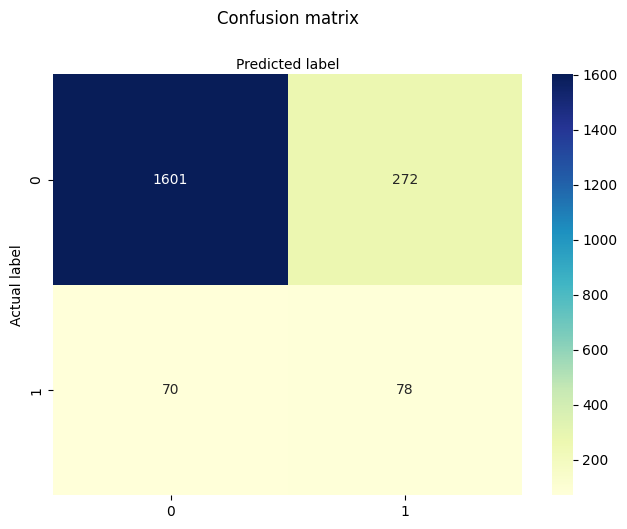

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(smote_rf_Recall, smote_rf_Precision, smote_rf_f1, smote_rf_accuracy, smote_rf_AUC)]

smote_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'AUC'])
smote_rf_score.insert(0, 'Random Forest with', 'SMOTE Oversampling')
smote_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy,AUC
0,SMOTE Oversampling,0.527027,0.222857,0.313253,0.830777,0.690903


Tiempos

In [ ]:
time_start = time.time()
np.int = int
smote_rf.fit(X_train_s, y_train_s)
time_smote_rf = time.time() - time_start
values_smote_rf = [50, smote_rf.best_score_, time_smote_rf]
results_smote_rf = pd.DataFrame([values_smote_rf], columns=['n_estimators', 'best_score', 'time'])
results_smote_rf

,n_estimators,best_score,time
0,50,0.516982,60.155872


## **Undersampling using Tomek Links**

In [ ]:
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train_ut, X_val_ut, y_train_ut, y_val_ut = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val_ut, X_test_ut, y_val_ut, y_test_ut = train_test_split(X_val_ut, y_val_ut, test_size=0.5, stratify=y_val_ut, random_state=42)

In [ ]:
from imblearn.under_sampling import TomekLinks

# define the undersampling method
#tomekU = TomekLinks(sampling_strategy='auto', n_jobs=-1)
tomekU = TomekLinks()

# fit and apply the transform
X_underT, y_underT = tomekU.fit_resample(X_train_ut, y_train_ut)

In [ ]:
print('No perdida:', y_underT.value_counts()[0], '/', round(y_underT.value_counts()[0]/len(y_underT) * 100,2), '% of the dataset')
print('Perdida:', y_underT.value_counts()[1], '/',round(y_underT.value_counts()[1]/len(y_underT) * 100,2), '% of the dataset')

No perdida: 6386 / 92.51 % of the dataset
Perdida: 517 / 7.49 % of the dataset


In [ ]:
underT_pipeline = make_pipeline(tomekU,
                              RandomForestClassifier(n_estimators=100, random_state=13))
cross_val_score(underT_pipeline, X_train_ut, y_train_ut, scoring='recall', cv=kf)

array([0.18269231, 0.13592233, 0.15533981, 0.17475728, 0.15384615])

In [ ]:
score4 = cross_val_score(underT_pipeline, X_train_ut, y_train_ut, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score4))
print("Average Cross Validation Recall score: {}".format(score4.mean()))

Cross Validation Recall Scores are: [0.18269231 0.13592233 0.15533981 0.17475728 0.15384615]
Average Cross Validation Recall score: 0.16051157580283792


In [ ]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
underT_rf = GridSearchCV(underT_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
underT_rf.fit(X_train_ut, y_train_ut)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('tomeklinks', TomekLinks()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', underT_rf.best_params_)
print('Best score:', underT_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__random_state': 13}
Best score: 0.14309185959671397


In [ ]:
y_pred_underT = underT_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test_ut)

In [ ]:
cm5 = confusion_matrix(y_test_ut, y_pred_underT)
underT_rf_Recall = recall_score(y_test_ut, y_pred_underT)
underT_rf_Precision = precision_score(y_test_ut, y_pred_underT)
underT_rf_f1 = f1_score(y_test_ut, y_pred_underT)
underT_rf_accuracy = accuracy_score(y_test_ut, y_pred_underT)
underT_rf_beta_score = fbeta_score(y_test_ut, y_pred_underT, beta=2, average='binary')
underT_rf_AUC= roc_auc_score (y_test_ut, y_pred_underT)
print(cm5)

[[1384   21]
 [  96   15]]


Text(0.5, 427.9555555555555, 'Predicted label')

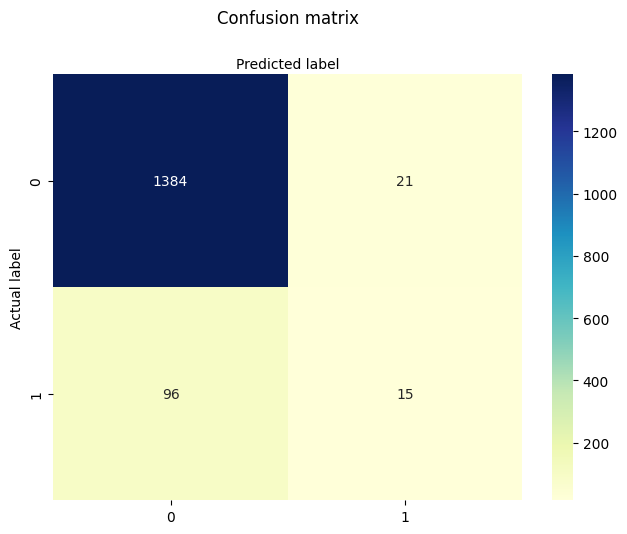

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(underT_rf_Recall, underT_rf_Precision, underT_rf_f1, underT_rf_accuracy, underT_rf_AUC)]
underT_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy','AUC'])
underT_rf_score.insert(0, 'Random Forest with', 'tomek undersampling')
underT_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy,AUC
0,tomek undersampling,0.135135,0.416667,0.204082,0.922823,0.560094


Tiempos

In [ ]:
time_start = time.time()
np.int = int
underT_rf.fit(X_train_ut, y_train_ut)
time_underT_rf = time.time() - time_start
values_underT_rf = [50, underT_rf.best_score_, time_underT_rf]
results_underT_rf = pd.DataFrame([values_underT_rf], columns=['n_estimators', 'best_score', 'time'])
results_underT_rf

,n_estimators,best_score,time
0,50,0.143092,53.057272


## **Combinando SMOTE y Tomek Links**

In [ ]:
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train_st, X_val_st, y_train_st, y_val_st = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val_st, X_test_st, y_val_st, y_test_st = train_test_split(X_val_st, y_val_st, test_size=0.5, stratify=y_val_st, random_state=42)

In [ ]:
from imblearn.combine import SMOTETomek

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                              RandomForestClassifier(n_estimators=100, random_state=13))

In [ ]:
SMOTETomek_rf = SMOTETomek_pipeline
SMOTETomek_rf.fit(X_train_st, y_train_st)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=13))])

In [ ]:
score5 = cross_val_score(SMOTETomek_pipeline, X_train_st, y_train_st, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score5))
print("Average Cross Validation Recall score: {}".format(score5.mean()))

Cross Validation Recall Scores are: [0.17977528 0.18181818 0.20454545 0.20224719 0.19101124]
Average Cross Validation Recall score: 0.19187946884576096


In [ ]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
SMOTETomek_rf = GridSearchCV(SMOTETomek_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
SMOTETomek_rf.fit(X_train_st, y_train_st)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smotetomek',
                                        SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', SMOTETomek_rf.best_params_)
print('Best score:', SMOTETomek_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__random_state': 13}
Best score: 0.5125638406537283


In [ ]:
y_pred_smoteT = SMOTETomek_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test_st)

In [ ]:
cm6 = confusion_matrix(y_test_st, y_pred_smoteT)
SMOTETomek_rf_Recall = recall_score(y_test_st, y_pred_smoteT)
SMOTETomek_rf_Precision = precision_score(y_test_st, y_pred_smoteT)
SMOTETomek_rf_f1 = f1_score(y_test_st, y_pred_smoteT)
SMOTETomek_rf_accuracy = accuracy_score(y_test_st, y_pred_smoteT)
SMOTETomek_rf_beta_score = fbeta_score(y_test_st, y_pred_smoteT, beta=2, average='binary')
SMOTETomek_rf_AUC= roc_auc_score (y_test_st, y_pred_smoteT)
print(cm6)

[[1581  292]
 [  67   81]]


Text(0.5, 427.9555555555555, 'Predicted label')

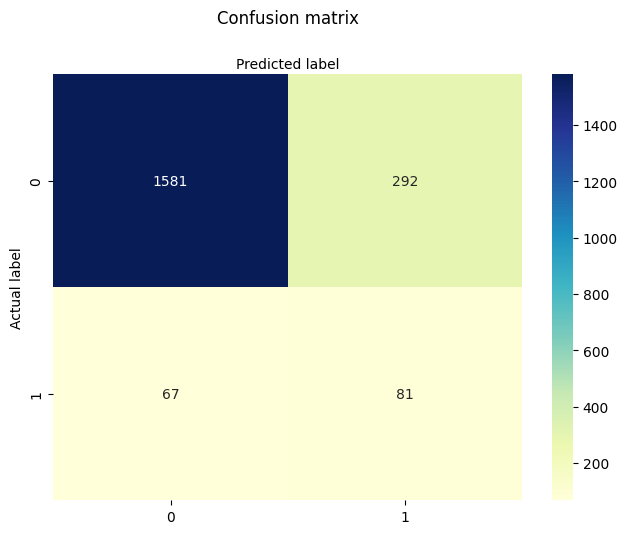

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm6), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(SMOTETomek_rf_Recall, SMOTETomek_rf_Precision, SMOTETomek_rf_f1, SMOTETomek_rf_accuracy, SMOTETomek_rf_AUC)]

SMOTETomek_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy','AUC'])
SMOTETomek_rf_score.insert(0, 'Random Forest with', 'SMOTE + Tomek')
SMOTETomek_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy,AUC
0,SMOTE + Tomek,0.547297,0.217158,0.31094,0.822365,0.695699


Tiempos

In [ ]:
time_start = time.time()
np.int = int
SMOTETomek_rf.fit(X_train_st, y_train_st)
time_SMOTETomek_rf = time.time() - time_start
values_SMOTETomek_rf = [100, SMOTETomek_rf.best_score_, time_SMOTETomek_rf]
results_SMOTETomek_rf = pd.DataFrame([values_SMOTETomek_rf], columns=['n_estimators', 'best_score', 'time'])
results_SMOTETomek_rf

,n_estimators,best_score,time
0,100,0.512538,99.085962


## **Balanced Random Forest (BRF)**

In [ ]:
X = df2.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df2['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train_bal, X_val_bal, y_train_bal, y_val_bal = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val_bal, X_test_bal, y_val_bal, y_test_bal = train_test_split(X_val_bal, y_val_bal, test_size=0.5, stratify=y_val_bal, random_state=42)

In [ ]:
rfb = RandomForestClassifier(n_estimators=100, random_state=13, class_weight="balanced")

In [ ]:
score6 = cross_val_score(rfb, X_train_bal, y_train_bal, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score6))
print("Average Cross Validation Recall score: {}".format(score6.mean()))

Cross Validation Recall scores are: [0.11235955 0.125      0.14772727 0.07865169 0.14606742]
Average Cross Validation Recall score: 0.1219611848825332


In [ ]:
grid_rfb = GridSearchCV(rfb, param_grid=params, cv=kf,
                          scoring='recall').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_rfb = grid_rfb.predict(X_test_bal)

In [ ]:
cm7 = confusion_matrix(y_test_bal, y_pred_rfb)
grid_rfb_Recall = recall_score(y_test_bal, y_pred_rfb)
grid_rfb_Precision = precision_score(y_test_bal, y_pred_rfb)
grid_rfb_f1 = f1_score(y_test_bal, y_pred_rfb)
grid_rfb_accuracy = accuracy_score(y_test_bal, y_pred_rfb)
grid_rfb_beta_score = fbeta_score(y_test_bal, y_pred_rfb, beta=2, average='binary')
grid_rfb_AUC= roc_auc_score (y_test_bal, y_pred_rfb)
print(cm7)

[[1564  309]
 [  60   88]]


Text(0.5, 427.9555555555555, 'Predicted label')

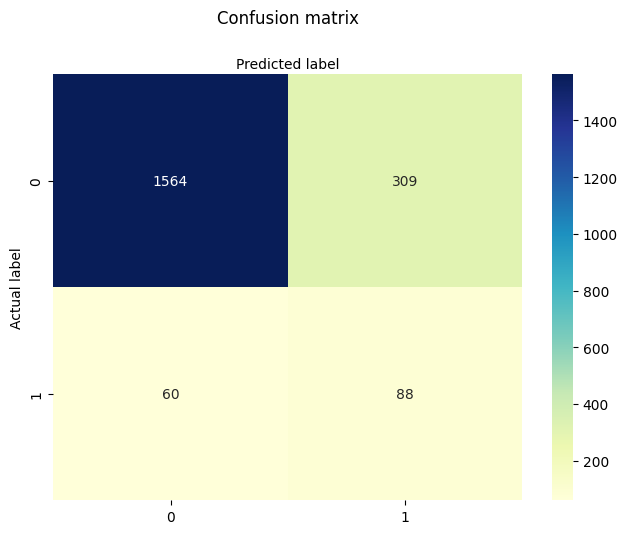

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm7), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(grid_rfb_Recall, grid_rfb_Precision, grid_rfb_f1, grid_rfb_accuracy, grid_rfb_AUC)]

grid_rfb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy','AUC'])
grid_rfb_score.insert(0, 'Random Forest with', 'RF Class weights')
grid_rfb_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy,AUC
0,RF Class weights,0.594595,0.221662,0.322936,0.817417,0.714809


Tiempos

In [ ]:
time_start = time.time()
np.int = int
grid_rfb.fit(X_train_bal, y_train_bal)
time_grid_rfb = time.time() - time_start
values_grid_rfb = [50, grid_rfb.best_score_, time_grid_rfb]
results_grid_rfb = pd.DataFrame([values_grid_rfb], columns=['n_estimators', 'best_score', 'time'])
results_grid_rfb

,n_estimators,best_score,time
0,50,0.539581,29.403167


## **Comparacion modelos**

In [ ]:
predictions = pd.concat([rf_score, over_rf_score, under_rf_score, smote_rf_score, SMOTETomek_rf_score, underT_rf_score, grid_rfb_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Recall'], ascending=False)

,Random Forest with,Recall,Precision,F1 Score,Accuracy,AUC
2,Undersampling,0.675676,0.182149,0.286944,0.754082,0.717977
6,RF Class weights,0.594595,0.221662,0.322936,0.817417,0.714809
1,Random Oversampling,0.581081,0.212871,0.311594,0.811974,0.705650
4,SMOTE + Tomek,0.547297,0.217158,0.310940,0.822365,0.695699
3,SMOTE Oversampling,0.527027,0.222857,0.313253,0.830777,0.690903
5,tomek undersampling,0.135135,0.416667,0.204082,0.922823,0.560094
0,No Under/Oversampling,0.094595,0.437500,0.155556,0.924790,0.542492


## **Comparacion Tiempos**

In [ ]:
results_combined = pd.concat([results_base_line_rf, results_over_rf, results_under_rf, results_smote_rf, results_underT_rf, results_SMOTETomek_rf, results_grid_rfb,], ignore_index=True)
results_combined.index = ['No Under/Oversampling','Random Undersampling', 'RF Class weights', 'Random Oversampling','SMOTE Oversampling', 'SMOTE + Tomek', 'tomek undersampling']
results_combined.sort_values(by=['time'], ascending=True)


,n_estimators,best_score,time
RF Class weights,50,0.636517,21.200212
No Under/Oversampling,200,0.094867,28.825912
tomek undersampling,50,0.539581,29.403167
Random Undersampling,50,0.548570,49.763796
SMOTE Oversampling,50,0.143092,53.057272
Random Oversampling,50,0.516982,60.155872
SMOTE + Tomek,100,0.512538,99.085962
